# Informed Classifier

## Project Introduction: Time Series Classification
Imagine we have two time series and our task is to distinguish between them. 
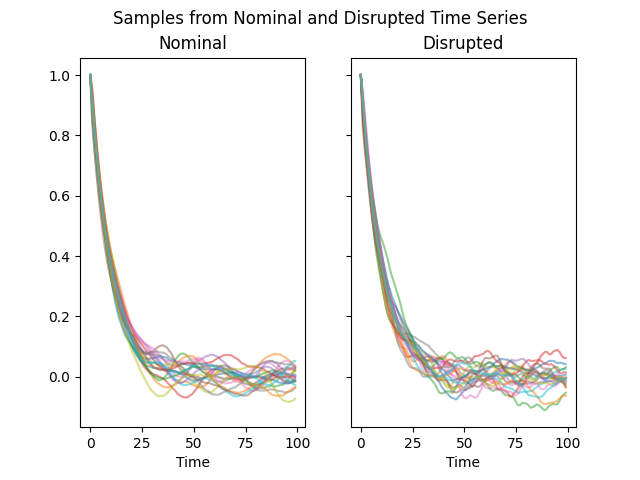

How would you approach building a classifier for these series? 

They look almost identical, though there's some more high frequency noise in the Disrupted time series samples and overall more variance. Maybe you'd explore engineering some good features for a neural network or a decision tree that would capture the high frequency content of the second time series.

## If you know the conditional distributions, Bayes is Best
What if you knew the process that both of these series came from perfectly? If you can write down P(X|C=c), using a Bayes classifier would give you optimal results. [see proof here] https://en.wikipedia.org/wiki/Bayes_classifier

### Definitions
I'll occasionally be swapping between calling these time series Process A & B and calling them nominal and disrupted. Process B will always be the disrupted case and Process A will be the nominal case. I'll talk about the design process for these distributions in the Generative Processes section (including why the covariance and mean functions look the way they do).

I also vary between calling them 100-dimensional Gaussians and finite-time, discrete Gaussian Process. Hopefully this is alright!

# Dataset
## Generative processes
I went through several iterations of designing these processes. It was quite challenging to make trajectories (samples from our 100-dim Gaussian / a sample from our finite-time, discrete Gaussian Process) that were distinguishable by eye, but were not trival to classify. The initial plot I showed in the project report generated 100% accuracy from the true-distribution Bayes classifier, almost 100% accuracy from the SVM and the fitted GP models.

[copy figure from project report]

Process A represents a "normal" or "nominal" run of a machine, trajectory of a dynamical system, etc. Process B was designed to be an augmented version of Process A, with additional terms in the covariance matrix to simulate "something going wrong". That might be additional higher-frequency, correlated vibrations in your experiment setup from something like a loose screw! Or something more like an additional force you didn't expect (though most forces wouldn't end up in your covariance matrix like that).

### Covariance Matrix
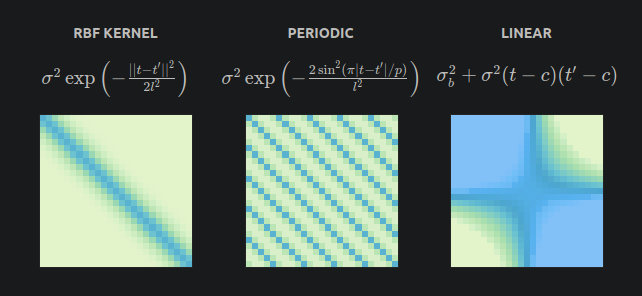\
***Figure: Kernel / covariance matrix types for Gaussian Processes, from [Ref 1. Distill.io](https://distill.pub/2019/visual-exploration-gaussian-processes/)***

The covariance matrix for Process B was chosen to be a linear combination of all three.
[Heat Map of Kernel]

## Overview of code
The associated repo is here: https://github.com/JuLieAlgebra/informed_classifier.

The project is set up in the following way (ignoring hidden files like `.gihub`):

.\
├─ config\
├─ data\
│   ├── Example experiment name: 100dim_10000samples_0.5ratio_0.0006train_0.8994test_0.1val\
│   │   ├── test\
│   │   ├── train\
│   │   └── validation\
│   ...\
├─ gen_data.py\
├─ informed_classification\
│   ├── `__init__`.py\
│   ├── bayes_classifier.py\
│   ├── common_utilities.py\
│   ├── generative_models.py\
│   ├── models.py\
│   └── naive_ml.py\
├─ poetry.lock\
├─ pyproject.toml\
├─ README.md\
├─ Report.ipynb\
├─ scripts\
│   ├── disrupted.py\
│   ├── evaluate_bayes.py\
│   └── evaluate_svm.py\
└─ tests\
    ├── test_gen_models.py\
    └── test_models.py


If you'd like, you can install Poetry and follow the three lines in the README to run this work for yourself.
There are tests for every module within.

## Bayes Classifier


# Situations to sweep:
For a variety of training set sizes...
- Process A and B are known.
- Process A is known, B's mean is known.
- Process A is known, B's covariance is known.
- Process A is known, only the family of Process B is known.
- Process A's mean is known, B's mean is known.
- Process A's covariance is known, B's covariance is known.
- Only the family of Process A and Process B are known.
- Nothing is known (use traditional discriminative models, like an SVM or neural network).

## Calculating Performance
Calculate average performance of each model on different size datasets. 
Do this by generating a large dataset, then for each desired dataset size, collect the performance metrics across k-fold validation.

Examining the performance of these models in very low-data regimes can be tricky. For n=10 training samples, fitting the mean and cov function of Process A & B saw testing (8,000) and validation (1,000) set accuracies from 90% to 61%, depending on which ten generated trajectories the models were allowed to train on. This emphasized the need for gauging the *average* and *median* accuracies for testing & validation, across a large number of repeated low-data trainings.

### Extensions and their Challenges
Something that would be more deep-learning based, but is a realistic extension of this work to more scenarios, would be if Process A was a dynamical system (with control inputs, even) whose description is pretty well known, but Process B represented an anomalous state with relatively little data.

Turning the dynamical system into `P(X=x|C=c)` for the classification task presents a small challenge, but one that's quite common and can be tackled in many different ways. 

## Real-World Datasets
Unfortunately the fusion community does not open source most of their data. Disruption databases are usually held by the organization responsible for the tokamak.

However, any classification task where the classes are relatively-known dynamical systems or the family of distributions that the data comes from is known are applicable. 

## Challenges Encountered
Along the way, I ran into a number of numerical instability issues and challenges with forming a non-singular covariance matrix.
The covariance matrix for the generated processes was 100x100 and the Gaussians themselves were, of course, 100 dimensional. The determinant of this covariance matrix can be extraordinarily tiny for these high dimensions, which introduces some oddnesses down the line.

[Talk about singular matrix adjustment]

# Conclusions
## Fitting Gaussian Processes
I claimed that we tested a large variety of scenarios representing differing amounts of prior knowledge about the distributions of Process A and Process B. However, nowhere did I fit A and B based on priors about the structure of the mean or covariance function. The mean function is an exponential curve that depends on time and the covariance function is shift-invariant. 

You could easily imagine a scenario where we know (perhaps from first principles models) that the mean function should be exponentially decaying, but we don't know the coefficients of that curve. We could have fit Process A and B based on that knowledge as well. However, this would likely involve making this system differentiable (& just-in-time compiled for the sake of runtime) in order to backprop to get gradients of the proposed mean function with respect to the model outputs. 

For fitting the shift-invariant covariance matrix, I'm not sure how I would fit a Toeplitz matrix in a way that respects the structure, but hopefully someone has published or written something on that kind of constrained optimization. 

These would both yield even better performance than our current mean and covariance fitting procedures, which are just the MLE of a general Gaussian Process.

In an ideal world, we also would [talk about consequence modeling].


# Plots to generate
- heat map of covariance matrix
- Plotting exponential mean func
- Gaussian-ness of generated data?
- S curve of model accuracy (and like recall, etc) with varying N on the x axis for each model.

# References
[1] https://distill.pub/2019/visual-exploration-gaussian-processes/